In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("/Users/MACOS/Desktop/Data_Analytics/Walmart_Time_Series_Sales/Grocery_Sales_TimeSeriesData/Train.csv")


In [3]:
df.head()

,Day,GrocerySales
0,1,8418.59
1,2,8447.47
2,3,8336.49
3,4,8579.17
4,5,8524.31


In [4]:
#I. EDA
types = df.dtypes
print(types)
print("Shape of the set is: ", df.shape)

Day               int64
GrocerySales    float64
dtype: object
Shape of the set is:  (692, 2)


In [5]:
#I.1. Explore
print("The statistic of numeric data")
print("Mean \t \t Median \t ")
print("%.2f \t %.2f" % (np.mean(df['GrocerySales']), np.median(df['GrocerySales'])) )



The statistic of numeric data
Mean 	 	 Median 	 
8564.73 	 8677.77


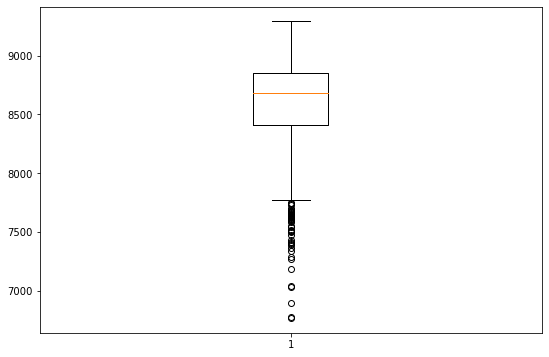

In [6]:
#I.2. Graph
#Box Plot
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(df['GrocerySales'])

# Save the figure
fig.savefig('BoxPlotSalesTimeSeries.png', bbox_inches='tight')

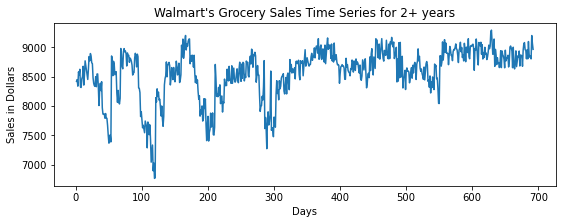

In [7]:
#Line graphs
plt.figure(figsize=(9, 3))
plt.plot(df['Day'], df['GrocerySales'])
plt.xlabel('Days')
plt.ylabel('Sales in Dollars')
plt.title('Walmart\'s Grocery Sales Time Series for 2+ years')
plt.show()

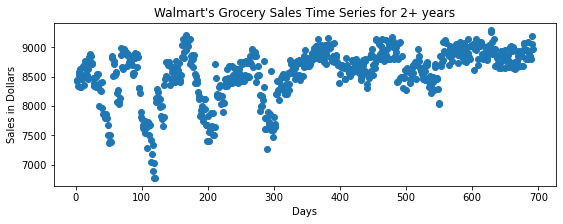

In [8]:
#Scatter plot
plt.figure(figsize=(9, 3))
plt.scatter(df['Day'], df['GrocerySales'])
plt.xlabel('Days')
plt.ylabel('Sales in Dollars')
plt.title('Walmart\'s Grocery Sales Time Series for 2+ years')
plt.show()

We found out that this is time series with a upward exponential trend and multiplacative seasonality. 
We will try the ARIMA models and Holt-Winters Exponential Smoothing

In [9]:
#Deleting the Day variable:
df = df["GrocerySales"]
df.head()

0    8418.59
1    8447.47
2    8336.49
3    8579.17
4    8524.31
Name: GrocerySales, dtype: float64

In [12]:
df.shape[0]

692

In [15]:
df[0]

8418.59

In [17]:
#Partitioning the model
train = df[0:round(df.shape[0]*0.6)]
test = df[(round(df.shape[0]*0.6)+1):df.shape[0]]

In [19]:
test.head()

416    8618.88
417    8780.75
418    8748.91
419    8575.98
420    8765.68
Name: GrocerySales, dtype: float64

In [21]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA

We should assess to see if the model is stationary. It means that:
1. The means of the series should not be a function of time
2. The variance of the series should not be a function of time
3. Covariance of the ith term and the i+m term should not be a function of time

To test, there are 2 methods:
+ Rolling statistics: Mean and Std Devs
+ Augmented Dickey-Fuller Test: Time Series is considered stationary if the p value is low and critical values at 1%, 5% and 10% are as closed as possible to ADF statistics

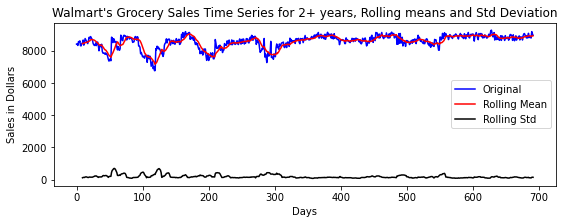

ADF Statistic: -4.316545880313046
p-value: 0.00041580115914319074
Critical Values:
	1%: -3.439876604020831
	5%: -2.8657439615125675
	10%: -2.5690087183208665


In [24]:
def isStationary(df):
    #Testing to see if the time series is stationary
    rolling_mean = df.rolling(window = 10).mean()
    rolling_std = df.rolling(window = 10).std()

    #Plotting
    plt.figure(figsize=(9, 3))
    plt.plot(df, color = 'blue', label = 'Original')
    plt.plot(rolling_mean, color = 'red', label = "Rolling Mean")
    plt.plot(rolling_std, color = 'black', label = "Rolling Std")
    plt.xlabel('Days')
    plt.ylabel('Sales in Dollars')
    plt.legend(loc = 'best')
    plt.title('Walmart\'s Grocery Sales Time Series for 2+ years, Rolling means and Std Deviation')
    plt.show()
    
    # Dickey–Fuller test:
    result = adfuller(df)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

#Testing it
isStationary(df)

The series may be stationary. p-value is closed to 0, stddev and means are oscillating around a constant over time. Critical values are closed to ADF statistics. 

In [20]:
#1. Classical/Statisical Forecasting
# ARIMA
#Function outputing the list of differences
def differencing(data, interval = 1):
    diff = list()
    for i in range(interval, len(data)):
        value = data[i] - data[i - interval]
        diff.append(value)
    return np.array(diff)

#Function outputing inversed differenced values:
def inverted_differencing(data, yhat, inteval = 1):
    return yhat + history[-interval]

